## Assessment / Midterm: Machine Vision and Deep Learning
<span style="color:blue">
    
1) Answer all questions
    
2) This assessment is open-book. You are allowed to refer to any references including online materials, books, notes, codes, github links, etc

3) Copy this notebook to your google drive (click **FILE** > **save a copy in Drive**)

4) Upload the **answer notebook & trained model** (for Question 3) to your github.

5) Submit the assessment by sharing the link to your github containing the answers.
    
</span>

**QUESTION 1 [15 marks]**

a) Let *k*, *s* and *p* be 4, 2 and 1, respectively. What will be the shape of the output of the convolutional layer? (2 marks)

>>import torch \
import torch.nn as nn \
input_img = torch.rand(1,3,10,10) \
layer = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=*k*, stride=*s*, padding=*p*)
print(layer(input_img).shape)

<span style="color:blue">
    answer:  torch.Size([1, 12, 5, 5])
                
</span>

b) Batch Normalization (BN) normalizes the mean and standard deviation for each: (tick X for the correct answer(s)) (2 marks)

 - [x] Individual feature map
 - [ ] Instance in the mini-batch
 - [X] Spatial dimension    

c) Which one of the following is not an advantage of Batch Normalization (BN)? (tick X for the correct answer(s)) (2 marks)

- [ ] BN accelerates the training of deep neural networks and tackles the vanishing gradient problem.
- [ ] For every input mini-batch, we calculate different statistics. This introduces some sort of regularization.
- [ ] BN reduces the dependence of gradients on the scale of the parameters or of their initial values.
- [X] BN needs a much slower learning rate for the total architecture to converge.

d) Choose the correct statement. (tick X for the correct answer) (2 marks)

- [X] A larger kernel is preferred for information that resides globally, and a smaller kernel is preferred for information that is distributed locally.
- [ ] A larger kernel is preferred for information that resides locally, and a smaller kernel is preferred for information that is distributed globally.

e) In the following network, how many learnable parameters (weights) are there? (2 marks)

In [ ]:
model = nn.Sequential(
        nn.Linear(3,20),
        nn.ReLU(),
        nn.Linear(20,2)
    )
# Count the number of parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total number of learnable parameters: {total_params}")

Total number of learnable parameters: 122


<span style="color:blue">
    answer: There are 122 learnable parameters.
</span>

f) Which of the following statements are true about deep neural networks? (tick X for the correct answer) (2 marks)

- [X] Deep neural networks usually require a big amount of data to be properly trained.
- [ ] They can be fooled by adversarial/ noisy examples.
- [ ] They are difficult to interpret and understand.
- [ ] They can still be subject to biases.
- [ ] They fail to understand the context of the data that they are handling.
- [ ] They perform very well on individual tasks but fail to generalize to many different tasks.

g) Run the code in the next cell.

In [ ]:
# import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

# generate synthetic data in 2D
X, Y = make_moons(500, noise=0.2)

# plot the data
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('2D Data')
plt.show()

Can this data be correctly separable using the classifier below? Why? (3 marks)

model = nn.Sequential( \
    nn.Linear(n_input_dim, n_output), \
    nn.Sigmoid() \
    )
    
<span style="color:blue">
    answer:
     NO. Linear classifier only contains a single linear layer. If the data is not linearly separable, a linear classifier may struggle to accurately classify the points.While the sigmoid activation function is capable of transforming the output of a neural network into a probability-like range (between 0 and 1), it may struggle to capture complex, non-linear decision boundaries in certain datasets.The dataset is not linearly separable due to its crescent moon shape, and the linear classifier with a sigmoid activation may struggle to capture the non-linear decision boundary needed to distinguish between the two classes.
     The data cannot be correctly separable using the provided classifier because of its simplicity and inability to capture the non-linear nature of the dataset.


</span>

**QUESTION 2 [40 marks]**

The COVID-19 pandemic continues to have a devastating effect on the health and well-being of the global population. A critical step in the fight against COVID-19 is effective screening of infected patients, with one of the key screening approaches being radiology examination using chest radiography. As a deep learning engineer, you are tasked to classify a dataset of X-ray images as either "normal", "covid" or "viral pneumonia". Use the chest X-ray dataset publicly available at https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset to answer the following questions.


a) Create and train a ConvNet corresponding to the following architecture in Fig. 1 (with modifications of the input and final layers). Please include **(10 marks)**:

    1) The dataloader to load the train and test datasets.

    2) The model definition (either using sequential method OR pytorch class method).

    3) Define your training loop.

    4) Output the mean accuracy for the whole testing dataset.

![pic](https://raw.githubusercontent.com/CUTe-EmbeddedAI/images/main/images/LeNet.png)
    
                                Fig. 1: A convolutional neural network

In [ ]:
###############################################
###############YOUR CODES HERE ################
###############################################

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, models
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose(
    [#transforms.Resize((40,40)),
    #  transforms.Augmix(),
    #  transforms.CenterCrop(),
     transforms.Resize((32,32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) ])


train_dir = '/content/drive/MyDrive/Covid19-dataset/train'
test_dir = '/content/drive/MyDrive/Covid19-dataset/test'

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=transform)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=transform)

In [ ]:
img, label = train_data[0]
train_data.classes

['Covid', 'Normal', 'Viral Pneumonia']

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=8, shuffle=True) # change batch_size to reduce memory error

test_dataloader = DataLoader(test_data, batch_size=8, shuffle=False) #turn our images into batches

In [ ]:
train_imgBatch, train_labelBatch = next(iter(train_dataloader))

In [ ]:
train_imgBatch.shape

torch.Size([8, 3, 32, 32])

In [ ]:
flatten_layer = nn.Flatten()
input = flatten_layer(train_imgBatch)
input.shape

torch.Size([8, 3072])

In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Convolutional Layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)  # C1
        self.subsample1 = nn.MaxPool2d(kernel_size=2, stride=2)  # S2
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)  # C3
        self.subsample2 = nn.MaxPool2d(kernel_size=2, stride=2)  # S4

        # # Fully Connected Layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # F5
        self.fc2 = nn.Linear(120, 10)  # F6

        # Activation Function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Convolutional Layers
        x = self.relu(self.conv1(x))
        x = self.subsample1(x)
        x = self.relu(self.conv2(x))
        x = self.subsample2(x)

        # Flatten before Fully Connected Layers
        x = x.view(-1, 16 * 5 * 5)

        # Fully Connected Layers
        x = self.relu(self.fc1(x))
        x = self.fc2(x)

        return x


#9 neurons altogether
model = CNNModel()


# Display the model architecture
print(model)

CNNModel(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (subsample1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (subsample2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
  (relu): ReLU()
)


In [ ]:

# loss and optimizer

# cross-entropy loss

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 3. move the model to GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

CNNModel(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (subsample1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (subsample2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
  (relu): ReLU()
)

In [ ]:
import time
from tqdm.auto import tqdm

def train_and_validate(model, loss_criterion, optimizer, train_dataloader, test_dataloader, epochs=25, device='cuda'):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param train_dataloader: DataLoader for training data
        :param test_dataloader: DataLoader for test/validation data
        :param epochs: Number of epochs (default=25)
        :param device: Device to perform computations ('cuda' or 'cpu')

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in tqdm(range(epochs)):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        model.train()

        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_dataloader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

        # Validation - No gradient tracking needed
        with torch.no_grad():

            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)


        # Find average training loss and training accuracy
        avg_train_loss = train_loss / len(train_dataloader.dataset)
        avg_train_acc = train_acc / len(train_dataloader.dataset)

        # Find average validation loss and training accuracy
        avg_test_loss = valid_loss / len(test_dataloader.dataset)
        avg_test_acc = valid_acc / len(test_dataloader.dataset)

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc * 100, avg_test_loss, avg_test_acc * 100, epoch_end - epoch_start))

        # Save if the model has best accuracy till now
        if avg_test_acc > best_acc:
            best_acc = avg_test_acc
            best_model = model
            torch.save(best_model, 'best_model.pt')

    return best_model, history

In [ ]:
num_epochs = 10
trained_model, history = train_and_validate(model, loss_fn, optimizer,
                                          train_dataloader, test_dataloader,
                                          num_epochs)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1/10
Epoch : 000, Training: Loss: 2.2971, Accuracy: 10.7570%, 
		Validation : Loss : 2.2291, Accuracy: 39.3939%, Time: 11.2699s
Epoch: 2/10
Epoch : 001, Training: Loss: 2.1406, Accuracy: 44.2231%, 
		Validation : Loss : 2.0228, Accuracy: 39.3939%, Time: 9.5508s
Epoch: 3/10
Epoch : 002, Training: Loss: 1.7671, Accuracy: 44.2231%, 
		Validation : Loss : 1.3799, Accuracy: 39.3939%, Time: 13.9386s
Epoch: 4/10
Epoch : 003, Training: Loss: 1.1344, Accuracy: 46.2151%, 
		Validation : Loss : 1.0623, Accuracy: 39.3939%, Time: 11.1552s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.9927, Accuracy: 52.9880%, 
		Validation : Loss : 0.9730, Accuracy: 60.6061%, Time: 9.9061s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.8634, Accuracy: 67.3307%, 
		Validation : Loss : 0.8308, Accuracy: 71.2121%, Time: 10.9805s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.6477, Accuracy: 81.6733%, 
		Validation : Loss : 0.6437, Accuracy: 78.7879%, Time: 11.1533s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.4186, Accuracy

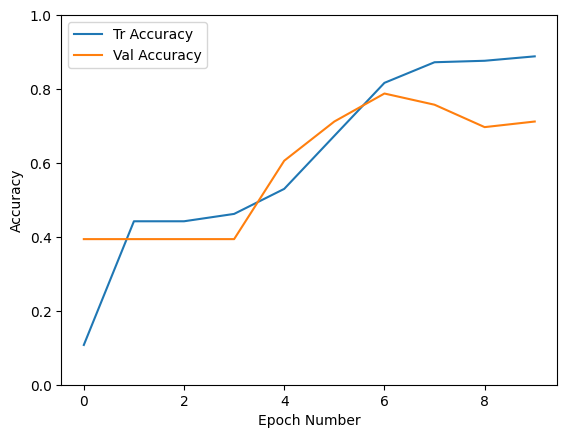

In [ ]:
def plot_accuracy(history):
  history = np.array(history)
  plt.plot(history[:,2:4])
  plt.legend(['Tr Accuracy', 'Val Accuracy'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Accuracy')
  plt.ylim(0,1)
  # plt.savefig('cifar10_accuracy_curve.png')
  plt.show()

plot_accuracy(history)

b) Based on Question 2 a), answer the following questions:
    
    i) Is the model overfitting? Why? (4 marks)
   <font color='blue'>YES. The consistent increase in training accuracy up to 88.84% suggests effective learning from the training data. However, the validation accuracy plateaus around 71.21%, indicating a lack of improvement in the model's performance on unseen data. The substantial gap between training and validation accuracy suggests over-specialization to the training data, hindering the model's ability to generalize effectively. Additionally, fluctuations in validation loss, though not consistently decreasing, further suggest overfitting.</font>
    
    ii) Propose two methods to reduce the effect of overfitting. (4 marks)
   <font color='blue'>Two methods that I propose are: (1) Batch Normalization and Dropout (2) Data Augmentation</font>
   
    iii) Implement the two proposed methods in Q2 b) ii) in the next cell and show that the overfitting has been reduced. (8 marks)

In [ ]:
###############################################
###############YOUR CODES HERE ################
###############################################

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, models
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose(
    [#transforms.Resize((40,40)),
    #  transforms.Augmix(),
    #  transforms.CenterCrop(),
     transforms.Resize((32,32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) ])


train_dir = '/content/drive/MyDrive/Covid19-dataset/train'
test_dir = '/content/drive/MyDrive/Covid19-dataset/test'

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=transform)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=transform)

In [ ]:
img, label = train_data[0]
train_data.classes

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=8, shuffle=True) # change batch_size to reduce memory error

test_dataloader = DataLoader(test_data, batch_size=8, shuffle=False) #turn our images into batches

In [ ]:
train_imgBatch, train_labelBatch = next(iter(train_dataloader))

In [ ]:
train_imgBatch.shape

In [ ]:
flatten_layer = nn.Flatten()
input = flatten_layer(train_imgBatch)
input.shape

In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Convolutional Layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)  # C1
        self.batchnorm1 = nn.BatchNorm2d(6)
        self.subsample1 = nn.MaxPool2d(kernel_size=2, stride=2)  # S2
        self.dropout1 = nn.Dropout(0.2)  # Dropout after subsample1
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)  # C3
        self.batchnorm2 = nn.BatchNorm2d(16)
        self.subsample2 = nn.MaxPool2d(kernel_size=2, stride=2)  # S4
        self.dropout2 = nn.Dropout(0.2)  # Dropout after subsample2

        # Fully Connected Layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # F5
        self.batchnorm3 = nn.BatchNorm1d(120)
        self.dropout3 = nn.Dropout(0.5)  # Dropout after fc1
        self.fc2 = nn.Linear(120, 10)  # F6

        # Activation Function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Convolutional Layers
        x = self.relu(self.conv1(x))
        x = self.batchnorm1(x)
        x = self.subsample1(x)
        x = self.dropout1(x)
        x = self.relu(self.conv2(x))
        x = self.batchnorm2(x)
        x = self.subsample2(x)
        x = self.dropout2(x)

        # Flatten before Fully Connected Layers
        x = x.view(-1, 16 * 5 * 5)

        # Fully Connected Layers
        x = self.relu(self.fc1(x))
        x = self.batchnorm3(x)
        x = self.dropout3(x)
        x = self.fc2(x)

        return x


#9 neurons altogether
model = CNNModel()

In [ ]:

# loss and optimizer

# cross-entropy loss

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 3. move the model to GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

In [ ]:
import time
from tqdm.auto import tqdm

def train_and_validate(model, loss_criterion, optimizer, train_dataloader, test_dataloader, epochs=25, device='cuda'):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param train_dataloader: DataLoader for training data
        :param test_dataloader: DataLoader for test/validation data
        :param epochs: Number of epochs (default=25)
        :param device: Device to perform computations ('cuda' or 'cpu')

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in tqdm(range(epochs)):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        model.train()

        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_dataloader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

        # Validation - No gradient tracking needed
        with torch.no_grad():

            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)


        # Find average training loss and training accuracy
        avg_train_loss = train_loss / len(train_dataloader.dataset)
        avg_train_acc = train_acc / len(train_dataloader.dataset)

        # Find average validation loss and training accuracy
        avg_test_loss = valid_loss / len(test_dataloader.dataset)
        avg_test_acc = valid_acc / len(test_dataloader.dataset)

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc * 100, avg_test_loss, avg_test_acc * 100, epoch_end - epoch_start))

        # Save if the model has best accuracy till now
        if avg_test_acc > best_acc:
            best_acc = avg_test_acc
            best_model = model
            torch.save(best_model, 'best_model.pt')

    return best_model, history

In [ ]:
num_epochs = 10
trained_model, history = train_and_validate(model, loss_fn, optimizer,
                                          train_dataloader, test_dataloader,
                                          num_epochs)

In [ ]:
def plot_accuracy(history):
  history = np.array(history)
  plt.plot(history[:,2:4])
  plt.legend(['Tr Accuracy', 'Val Accuracy'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Accuracy')
  plt.ylim(0,1)
  # plt.savefig('cifar10_accuracy_curve.png')
  plt.show()

plot_accuracy(history)

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, models
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose(
    [#transforms.Resize((40,40)),
    #  transforms.Augmix(),
    #  transforms.CenterCrop(),
     transforms.Resize((32,32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) ])


train_dir = '/content/drive/MyDrive/Covid19-dataset/train'
test_dir = '/content/drive/MyDrive/Covid19-dataset/test'

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=transform)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=transform)

In [ ]:
img, label = train_data[0]
train_data.classes

['Covid', 'Normal', 'Viral Pneumonia']

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=8, shuffle=True) # change batch_size to reduce memory error

test_dataloader = DataLoader(test_data, batch_size=8, shuffle=False) #turn our images into batches

In [ ]:
train_imgBatch, train_labelBatch = next(iter(train_dataloader))

In [ ]:
train_imgBatch.shape

torch.Size([8, 3, 32, 32])

In [ ]:
flatten_layer = nn.Flatten()
input = flatten_layer(train_imgBatch)
input.shape

torch.Size([8, 3072])

In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # Convolutional Layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)  # C1
        self.batchnorm1 = nn.BatchNorm2d(6)
        self.subsample1 = nn.MaxPool2d(kernel_size=2, stride=2)  # S2
        self.dropout1 = nn.Dropout(0.2)  # Dropout after subsample1
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)  # C3
        self.batchnorm2 = nn.BatchNorm2d(16)
        self.subsample2 = nn.MaxPool2d(kernel_size=2, stride=2)  # S4
        self.dropout2 = nn.Dropout(0.2)  # Dropout after subsample2

        # Fully Connected Layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # F5
        self.batchnorm3 = nn.BatchNorm1d(120)
        self.dropout3 = nn.Dropout(0.5)  # Dropout after fc1
        self.fc2 = nn.Linear(120, 10)  # F6

        # Activation Function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Convolutional Layers
        x = self.relu(self.conv1(x))
        x = self.batchnorm1(x)
        x = self.subsample1(x)
        x = self.dropout1(x)
        x = self.relu(self.conv2(x))
        x = self.batchnorm2(x)
        x = self.subsample2(x)
        x = self.dropout2(x)

        # Flatten before Fully Connected Layers
        x = x.view(-1, 16 * 5 * 5)

        # Fully Connected Layers
        x = self.relu(self.fc1(x))
        x = self.batchnorm3(x)
        x = self.dropout3(x)
        x = self.fc2(x)

        return x


#9 neurons altogether
model = CNNModel()

In [ ]:
# model_pretrained = models.vgg16(pretrained = True)

In [ ]:
# model_pretrained

In [ ]:
# num_ftrs = model_pretrained.classifier[6].in_features
# model_pretrained.classifier[6] = nn.Linear(num_ftrs, 3)
# model_pretrained

In [ ]:
model = model

In [ ]:

# loss and optimizer

# cross-entropy loss

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 3. move the model to GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

CNNModel(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (batchnorm1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (subsample1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.2, inplace=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (batchnorm2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (subsample2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (batchnorm3): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
  (relu): ReLU()
)

In [ ]:
import time
from tqdm.auto import tqdm

def train_and_validate(model, loss_criterion, optimizer, train_dataloader, test_dataloader, epochs=25, device='cuda'):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param train_dataloader: DataLoader for training data
        :param test_dataloader: DataLoader for test/validation data
        :param epochs: Number of epochs (default=25)
        :param device: Device to perform computations ('cuda' or 'cpu')

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in tqdm(range(epochs)):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        model.train()

        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_dataloader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

        # Validation - No gradient tracking needed
        with torch.no_grad():

            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)


        # Find average training loss and training accuracy
        avg_train_loss = train_loss / len(train_dataloader.dataset)
        avg_train_acc = train_acc / len(train_dataloader.dataset)

        # Find average validation loss and training accuracy
        avg_test_loss = valid_loss / len(test_dataloader.dataset)
        avg_test_acc = valid_acc / len(test_dataloader.dataset)

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc * 100, avg_test_loss, avg_test_acc * 100, epoch_end - epoch_start))

        # Save if the model has best accuracy till now
        if avg_test_acc > best_acc:
            best_acc = avg_test_acc
            best_model = model
            torch.save(best_model, 'best_model.pt')

    return best_model, history

In [ ]:
num_epochs = 10
trained_model, history = train_and_validate(model, loss_fn, optimizer,
                                          train_dataloader, test_dataloader,
                                          num_epochs)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1/10
Epoch : 000, Training: Loss: 2.0079, Accuracy: 36.2550%, 
		Validation : Loss : 1.2302, Accuracy: 80.3030%, Time: 10.8697s
Epoch: 2/10
Epoch : 001, Training: Loss: 1.0660, Accuracy: 74.9004%, 
		Validation : Loss : 0.5994, Accuracy: 86.3636%, Time: 11.0201s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.8380, Accuracy: 80.4781%, 
		Validation : Loss : 0.6481, Accuracy: 78.7879%, Time: 11.0448s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.5024, Accuracy: 87.6494%, 
		Validation : Loss : 0.5514, Accuracy: 83.3333%, Time: 9.6480s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.5037, Accuracy: 86.0558%, 
		Validation : Loss : 0.4986, Accuracy: 83.3333%, Time: 11.0680s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.5080, Accuracy: 86.0558%, 
		Validation : Loss : 0.6423, Accuracy: 77.2727%, Time: 11.1777s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.5222, Accuracy: 87.2510%, 
		Validation : Loss : 0.4470, Accuracy: 86.3636%, Time: 10.9837s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.3793, Accurac

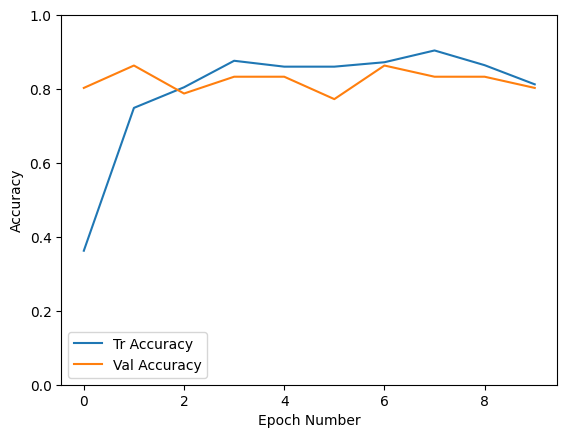

In [ ]:
def plot_accuracy(history):
  history = np.array(history)
  plt.plot(history[:,2:4])
  plt.legend(['Tr Accuracy', 'Val Accuracy'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Accuracy')
  plt.ylim(0,1)
  # plt.savefig('cifar10_accuracy_curve.png')
  plt.show()

plot_accuracy(history)

c) Replace your defined ConvNet in b) with a pre-trained model. Then, proceed with a transfer learning and finetune the model for the COVID-19 dataset. **(10 marks)**

In [ ]:
###############################################
###############YOUR CODES HERE ################
###############################################

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, models
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose(
    [#transforms.Resize((40,40)),
    #  transforms.Augmix(),
    #  transforms.CenterCrop(),
     transforms.Resize((32,32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) ])


train_dir = '/content/drive/MyDrive/Covid19-dataset/train'
test_dir = '/content/drive/MyDrive/Covid19-dataset/test'

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=transform)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=transform)

In [ ]:
img, label = train_data[0]
train_data.classes

['Covid', 'Normal', 'Viral Pneumonia']

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=8, shuffle=True) # change batch_size to reduce memory error

test_dataloader = DataLoader(test_data, batch_size=8, shuffle=False) #turn our images into batches

In [ ]:
train_imgBatch, train_labelBatch = next(iter(train_dataloader))

In [ ]:
train_imgBatch.shape

torch.Size([8, 3, 32, 32])

In [ ]:
flatten_layer = nn.Flatten()
input = flatten_layer(train_imgBatch)
input.shape

torch.Size([8, 3072])

In [ ]:
model_pretrained = models.vgg16(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 90.5MB/s]


In [ ]:
model_pretrained

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
num_ftrs = model_pretrained.classifier[6].in_features
model_pretrained.classifier[6] = nn.Linear(num_ftrs, 3)
model_pretrained

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
model = model_pretrained

In [ ]:

# loss and optimizer

# cross-entropy loss

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 3. move the model to GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

In [ ]:
import time
from tqdm.auto import tqdm

def train_and_validate(model, loss_criterion, optimizer, train_dataloader, test_dataloader, epochs=25, device='cuda'):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param train_dataloader: DataLoader for training data
        :param test_dataloader: DataLoader for test/validation data
        :param epochs: Number of epochs (default=25)
        :param device: Device to perform computations ('cuda' or 'cpu')

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in tqdm(range(epochs)):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        model.train()

        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_dataloader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

        # Validation - No gradient tracking needed
        with torch.no_grad():

            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)


        # Find average training loss and training accuracy
        avg_train_loss = train_loss / len(train_dataloader.dataset)
        avg_train_acc = train_acc / len(train_dataloader.dataset)

        # Find average validation loss and training accuracy
        avg_test_loss = valid_loss / len(test_dataloader.dataset)
        avg_test_acc = valid_acc / len(test_dataloader.dataset)

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc * 100, avg_test_loss, avg_test_acc * 100, epoch_end - epoch_start))

        # Save if the model has best accuracy till now
        if avg_test_acc > best_acc:
            best_acc = avg_test_acc
            best_model = model
            torch.save(best_model, 'best_model.pt')

    return best_model, history

In [ ]:
num_epochs = 10
trained_model, history = train_and_validate(model, loss_fn, optimizer,
                                          train_dataloader, test_dataloader,
                                          num_epochs)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1/10
Epoch : 000, Training: Loss: 0.9351, Accuracy: 66.1355%, 
		Validation : Loss : 0.8389, Accuracy: 62.1212%, Time: 12.7901s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.4923, Accuracy: 84.0637%, 
		Validation : Loss : 0.4102, Accuracy: 84.8485%, Time: 12.2743s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.3339, Accuracy: 89.2430%, 
		Validation : Loss : 0.6442, Accuracy: 68.1818%, Time: 11.9975s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.1978, Accuracy: 94.4223%, 
		Validation : Loss : 0.3430, Accuracy: 83.3333%, Time: 11.2608s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.0903, Accuracy: 97.2112%, 
		Validation : Loss : 0.2567, Accuracy: 90.9091%, Time: 12.0086s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.1178, Accuracy: 96.4143%, 
		Validation : Loss : 0.1318, Accuracy: 95.4545%, Time: 12.2497s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.0898, Accuracy: 98.0080%, 
		Validation : Loss : 0.1788, Accuracy: 93.9394%, Time: 12.1565s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.0190, Accura

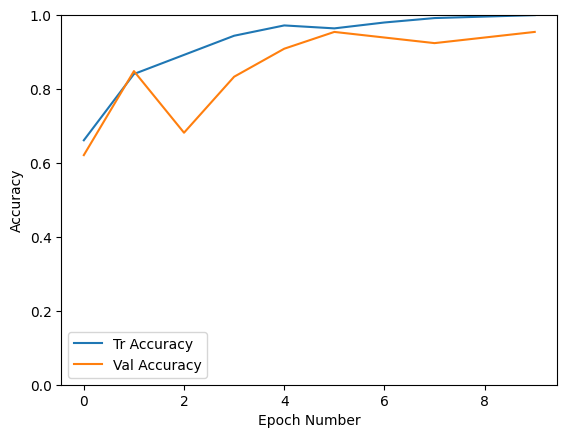

In [ ]:
def plot_accuracy(history):
  history = np.array(history)
  plt.plot(history[:,2:4])
  plt.legend(['Tr Accuracy', 'Val Accuracy'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Accuracy')
  plt.ylim(0,1)
  # plt.savefig('cifar10_accuracy_curve.png')
  plt.show()

plot_accuracy(history)

d) Do you see any accuracy improvement? Whether it is a "yes" or "no", discuss the possible reasons contributing to the accuracy improvement/ unimprovement. **(4 marks)**

<span style="color:blue">
    YES. the maximun validation accuracy for vgg16 is 95.4545%, higher compared to cnn which is 86.3636%. By finetuning the network with the new model VGG16, we are pretraining the data with its model's dataset which has a greater collection of image sources, 14 Million.(With Reference to https://www.geeksforgeeks.org/vgg-16-cnn-model/). Furthermore, the model has an increased amount of layers. Which increases the accuracy as well.  </span>

**QUESTION 3** **[15 marks]**

In a machine vision project, you decide to design a door access control system based on hand gestures. Only those who shows the correct hand gesture will be granted the access. There are three gestures that are recognized as correct access passcode which are "shaka", "peace" and "thumbs up", as depicted in Fig. 2.

![pic](https://simplyorganizedhi.com/media/catalog/product/1/6/169500.jpg)

                                Fig. 2 Shaka,peace, and thumbs up


Using the end-to-end object detection pipeline that you have learned, develop your own hand gesture detector so that it can be incorporate to a door access control system.

Deliverable for this question is the model .pt file. Change the name to <your_name>.pt file (e.g. hasan.pt).

- Marks are given based on the performance of the model when tested using my machine and camera at my office. This question aims to evaluate the model's robustness and generalization capabilities.